CPD for X:
+------+-----+
| X(0) | 0.6 |
+------+-----+
| X(1) | 0.4 |
+------+-----+

CPD for Z:
+------+-----+
| Z(0) | 0.7 |
+------+-----+
| Z(1) | 0.3 |
+------+-----+

CPD for Y:
+------+------+------+------+------+
| X    | X(0) | X(0) | X(1) | X(1) |
+------+------+------+------+------+
| Z    | Z(0) | Z(1) | Z(0) | Z(1) |
+------+------+------+------+------+
| Y(0) | 0.9  | 0.8  | 0.7  | 0.1  |
+------+------+------+------+------+
| Y(1) | 0.1  | 0.2  | 0.3  | 0.9  |
+------+------+------+------+------+

Joint Probability Distribution:
+------+------+------+--------------+
| X    | Y    | Z    |   phi(X,Y,Z) |
+======+======+======+==============+
| X(0) | Y(0) | Z(0) |       0.3780 |
+------+------+------+--------------+
| X(0) | Y(0) | Z(1) |       0.1440 |
+------+------+------+--------------+
| X(0) | Y(1) | Z(0) |       0.0420 |
+------+------+------+--------------+
| X(0) | Y(1) | Z(1) |       0.0360 |
+------+------+------+--------------+
| X(1) | Y(0) | Z(0) |       0.

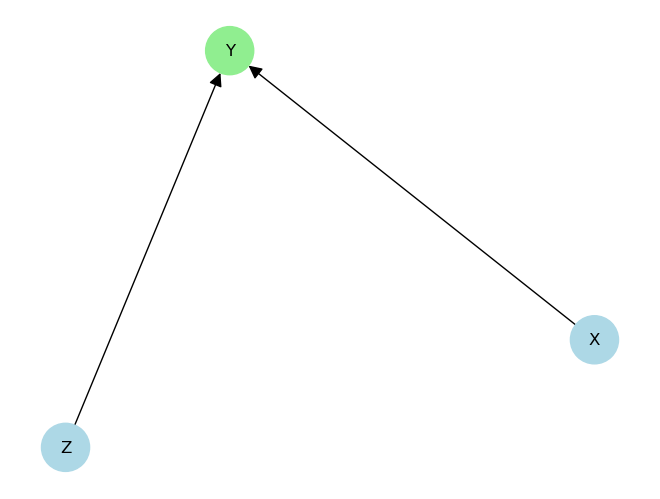

In [1]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.inference import VariableElimination

# Define the Bayesian Network
model = BayesianNetwork([('X', 'Y'), ('Z', 'Y')])

# Define Conditional Probability Distributions (CPDs)
cpd_x = TabularCPD(variable='X', variable_card=2, values=[[0.6], [0.4]])
cpd_z = TabularCPD(variable='Z', variable_card=2, values=[[0.7], [0.3]])
cpd_y = TabularCPD(variable='Y', variable_card=2,
                   values=[[0.9, 0.8, 0.7, 0.1], [0.1, 0.2, 0.3, 0.9]],
                   evidence=['X', 'Z'],
                   evidence_card=[2, 2])

# Add CPDs to the model
model.add_cpds(cpd_x, cpd_z, cpd_y)

# Check if the model is valid
assert model.check_model()

# Print CPDs
print("CPD for X:")
print(cpd_x)
print("\nCPD for Z:")
print(cpd_z)
print("\nCPD for Y:")
print(cpd_y)

# Create a directed graph (DiGraph)
dag = nx.DiGraph()

# Add nodes and edges to the DiGraph
dag.add_nodes_from(model.nodes())
dag.add_edges_from(model.edges())

# Position nodes using a spring layout
pos = nx.spring_layout(dag)

# Define node colors
node_colors = {'X': 'lightblue', 'Z': 'lightblue', 'Y': 'lightgreen'}

# Add nodes and edges to the DiGraph with different colors
for node in model.nodes():
    dag.add_node(node, color=node_colors[node])

dag.add_edges_from(model.edges())

# Get node colors from the dictionary
colors = [node_colors[node] for node in dag.nodes()]

# Draw the Bayesian Network as a directed graph with different node colors
nx.draw(dag, pos, with_labels=True, node_color=colors, node_size=1200,
        font_size=12, font_color='black', arrowsize=20)

# Initialize the inference object
inference = VariableElimination(model)

# Calculate joint probabilities
joint_prob = inference.query(variables=['X', 'Y', 'Z'], evidence={})
print("\nJoint Probability Distribution:")
print(joint_prob)

# Show the plot
plt.show()


In [ ]:
pip install pgmpy
